<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline 

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [2]:
# Nhập code của bạn ở đây:
df_init = pd.read_csv('pima-indians-diabetes.csv')
df = df_init.set_axis(['NumTimesPrg', 'PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI', 
                     'DiPedFunc', 'Age', 'HasDiabetes'], axis=1, inplace=False) #đổi tên các cột theo đúng pipeline
df.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [3]:
# Nhập code của bạn ở đây:
import seaborn as sns
corr_df = df.corr() 

### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

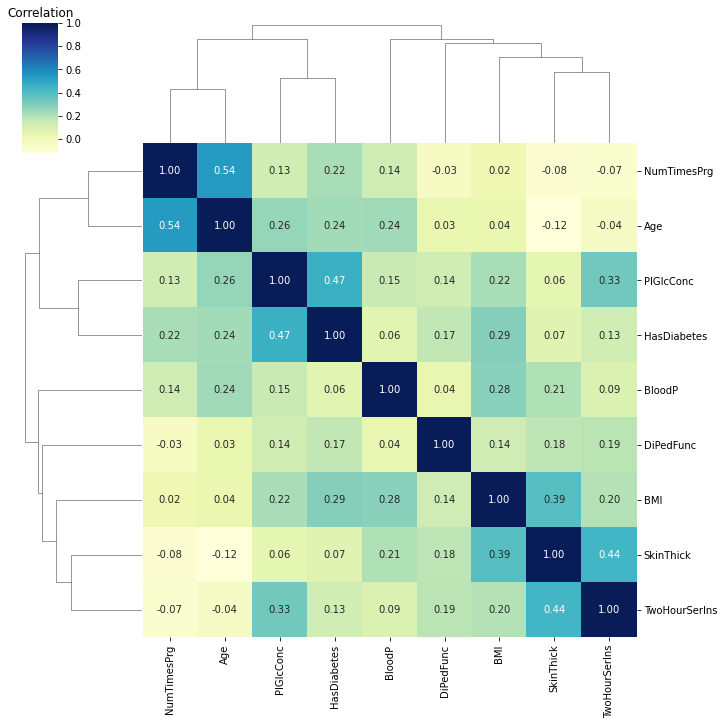

In [4]:
# Nhập code của bạn ở đây:
sns.clustermap(corr_df,annot= True,cmap = "YlGnBu",fmt = '.2f')
plt.title('Correlation')
plt.show();

## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

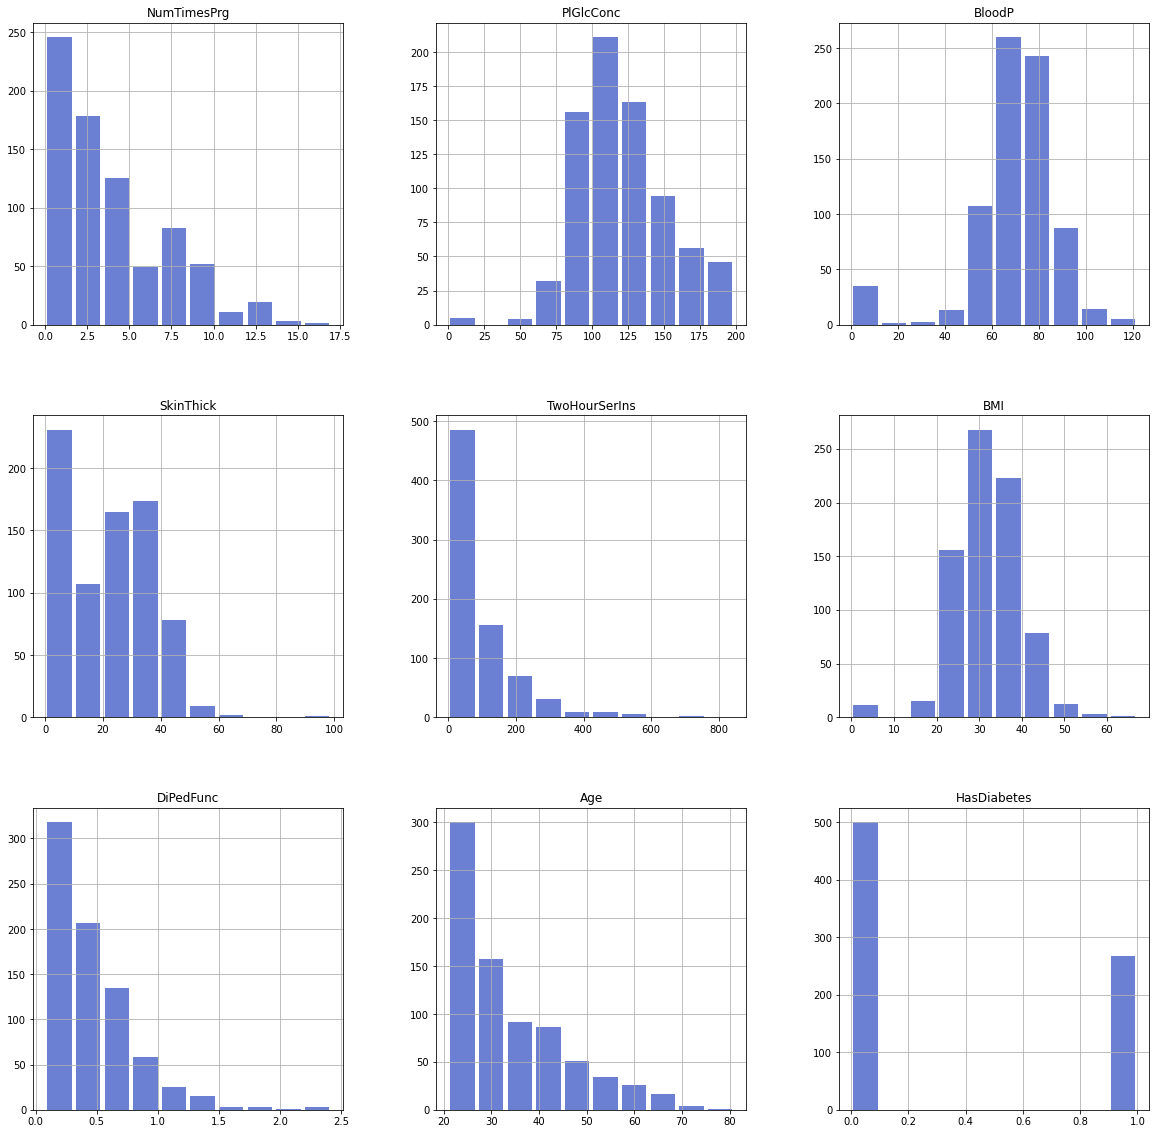

In [5]:
# Nhập code của bạn ở đây:
fig = df.hist(figsize = (20,20), color='#2D4ABF',alpha=0.7, rwidth=0.85)

Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [6]:
# Nhập code của bạn ở đây:
df[['PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']] = df[['PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']].replace(0, np.nan)
for col in df.drop('HasDiabetes', axis = 1).columns:
    print("độ lệch mẫu của tập dữ liệu {} là {}".format(col, df[col].skew()))
    
df['TwoHourSerIns'] = df['TwoHourSerIns'].fillna(df['TwoHourSerIns'].median()) #Điền các giá trị null với giá trị trung bình.

for col in ['PlGlcConc', 'BloodP', 'SkinThick', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())    
df.isnull().sum()

độ lệch mẫu của tập dữ liệu NumTimesPrg là 0.9039762643556906
độ lệch mẫu của tập dữ liệu PlGlcConc là 0.5339777900916466
độ lệch mẫu của tập dữ liệu BloodP là 0.13392752241515188
độ lệch mẫu của tập dữ liệu SkinThick là 0.6933691651021715
độ lệch mẫu của tập dữ liệu TwoHourSerIns là 2.166463843812443
độ lệch mẫu của tập dữ liệu BMI là 0.5942610397883523
độ lệch mẫu của tập dữ liệu DiPedFunc là 1.9211904511620612
độ lệch mẫu của tập dữ liệu Age là 1.1351646947682954


NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [7]:
# Nhập code của bạn ở đây:
from sklearn.preprocessing import StandardScaler

X = df.drop(['HasDiabetes'], axis = 1).values
Y = df['HasDiabetes']

X = StandardScaler().fit_transform(X)
X

array([[-0.84372629, -1.20482941, -0.52956011, ..., -0.8517715 ,
        -0.36426474, -0.18894038],
       [ 1.23423997,  2.01661929, -0.69489941, ..., -1.33176959,
         0.60470064, -0.1037951 ],
       [-0.84372629, -1.0733417 , -0.52956011, ..., -0.63359055,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  , -0.02144009, -0.03354219, ..., -0.90995308,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.14291954, -1.02557802, ..., -0.34268262,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.941854  , -0.1988815 , ..., -0.29904643,
        -0.47293375, -0.87010264]])

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [8]:
# Nhập code của bạn ở đây:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

Đáp án: 
- Việc mô hình càng sâu sẽ có nhiều layer cùng với đó là có nhiều hàm kích hoạt, nó sẽ làm biến đổi đi phân phối của dữ liệu. Do đó chúng ta cần chuẩn hóa lại nó để có được sự đồng bộ phân phối của dữ liệu trong quá trình huấn luyện. 
- Việc tối ưu sẽ trở nên nhanh hơn bởi vì normalization không cho phép việc bùng nổ (explode) weights và nó giới hạn chúng trong một vùng nhất định.
- Chuẩn hóa dữ liệu mỗi feature sẽ giữ được sự đóng góp của mọi feature trong quá trình huấn luyện trong trường hợp giá trị một số features cao hơn nhiều so với các feature còn lại.

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [9]:
# Nhập code của bạn ở đây:
# tập dữ liệu đầy đủ
HasDiabetes_0 =len(df[df.HasDiabetes==0])
HasDiabetes_1 =len(df[df.HasDiabetes==1])
Total = HasDiabetes_0 + HasDiabetes_1
diabetic = HasDiabetes_1*100/Total
print('tỷ lệ dương tính theo tập dữ liệu đầu đủ: ', diabetic)

# tập huấn luyện
Y_Train_df = pd.DataFrame(Y_Train)
HasDiabetes_0_train = len(Y_Train_df[Y_Train_df.HasDiabetes==0])
HasDiabetes_1_train = len(Y_Train_df[Y_Train_df.HasDiabetes==1])
Total_train = HasDiabetes_0_train + HasDiabetes_1_train
diabetic_train = HasDiabetes_1_train*100/Total_train
print('tỷ lệ dương tính theo tập huấn luyện: ', diabetic_train)

# tập kiểm tra
Y_Test_df = pd.DataFrame(Y_Test)
HasDiabetes_0_test = len(Y_Test_df[Y_Test_df.HasDiabetes==0])
HasDiabetes_1_test = len(Y_Test_df[Y_Test_df.HasDiabetes==1])
Total_test = HasDiabetes_0_test + HasDiabetes_1_test
diabetic_test = HasDiabetes_1_test*100/Total_test
print('tỷ lệ dương tính theo tập kiểm tra: ', diabetic_test)

tỷ lệ dương tính theo tập dữ liệu đầu đủ:  34.8109517601043
tỷ lệ dương tính theo tập huấn luyện:  35.39967373572594
tỷ lệ dương tính theo tập kiểm tra:  32.467532467532465


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [10]:
from sklearn.metrics import jaccard_score, f1_score

In [11]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sklearn

In [13]:
# Nhập code của bạn ở đây:
# tìm giá trị k tốt nhất 
tt = {}
il = []
ac=[]
for  i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_Train,Y_Train)
    y_pred = knn.predict(X_Test)
    from sklearn.metrics import accuracy_score
    il.append(i)   
    ac.append( sklearn.metrics.roc_auc_score(Y_Test,y_pred) )
    tt.update({'K':il})
    tt.update({'ROC_ACC':ac})
vv = pd.DataFrame(tt)
vv.sort_values('ROC_ACC',ascending=False,inplace=True,ignore_index=True)
print(vv.head(10))

# report với f1-score
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_Train,Y_Train)
y_pred = knn.predict(X_Test)
y_pred_train = knn.predict(X_Train)

print('f1 score KNN_test: ', f1_score(Y_Test,y_pred))
print('f1 score KNN_train: ',f1_score(Y_Train,y_pred_train))

# Jaccard score
print('Jaccard score KNN_test: ',jaccard_score(Y_Test, y_pred,pos_label=0))
print('Jaccard score KNN_train: ',jaccard_score(Y_Train, y_pred_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'KNN': f1_score(Y_Test,y_pred)})
f1_scores['train'].update({'KNN': f1_score(Y_Train,y_pred_train)})
jaccard_scores['test'].update({'KNN': jaccard_score(Y_Test, y_pred,pos_label=0)})
jaccard_scores['train'].update({'KNN': jaccard_score(Y_Train, y_pred_train,pos_label=0)})

    K   ROC_ACC
0  17  0.757115
1  21  0.747500
2  19  0.747115
3  15  0.741923
4   9  0.737885
5  11  0.737885
6  13  0.737885
7   7  0.727500
8  31  0.722308
9  23  0.722308
f1 score KNN_test:  0.6739130434782609
f1 score KNN_train:  0.6632124352331606
Jaccard score KNN_test:  0.7560975609756098
Jaccard score KNN_train:  0.7319587628865979


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

Trả lời:  sử dụng vòng lặp và tìm ra k tối ưu nhất theo đoạn code ở trên


## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [14]:
from sklearn import tree

In [15]:
#Nhập code của bạn ở đây:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_Train,Y_Train)

param_dist={
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]
}

grid = GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)
grid.fit(X_Train,Y_Train)
print(grid.best_params_)

# chọn criterion là entropy và max_depth là 3
HasDiabetes_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
HasDiabetes_Tree.fit(X_Train, Y_Train)
y_pred_tree = HasDiabetes_Tree.predict(X_Test)
y_pred_tree_train = HasDiabetes_Tree.predict(X_Train)

# in ra các giá trị f1-score và jaccard
print('f1 score DT_test: ', f1_score(Y_Test,y_pred_tree))
print('f1 score DT_train: ', f1_score(Y_Train,y_pred_tree_train))
print('Jaccard score DT_test: ',jaccard_score(Y_Test, y_pred_tree,pos_label=0))
print('Jaccard score DT_train: ',jaccard_score(Y_Train, y_pred_tree_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'DT': f1_score(Y_Test,y_pred_tree)})
f1_scores['train'].update({'DT': f1_score(Y_Train,y_pred_tree_train)})
jaccard_scores['test'].update({'DT': jaccard_score(Y_Test, y_pred_tree,pos_label=0)})
jaccard_scores['train'].update({'DT': jaccard_score(Y_Train, y_pred_tree_train,pos_label=0)})


{'criterion': 'entropy', 'max_depth': 3}
f1 score DT_test:  0.7058823529411766
f1 score DT_train:  0.7104722792607802
Jaccard score DT_test:  0.6875
Jaccard score DT_train:  0.6795454545454546


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

Đáp án:

Sử dụng GridSerchCV cho 10 vòng lặp và xem đâu là giá trị tốt nhất của decision tree như đoạn code ở trên

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', SVC(random_state=7))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},{'clf__C': param_range,'clf__gamma': param_range,'clf__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X_Train, Y_Train)
print(gs.best_params_)

{'clf__C': 0.01, 'clf__kernel': 'linear'}


In [17]:
# Nhập code của bạn ở đây:
from sklearn import svm
clf_SVC = svm.SVC(C=0.01, kernel = 'linear')
clf_SVC.fit(X_Train, Y_Train)
y_pred_SVM = clf_SVC.predict(X_Test)
y_pred_SVM_train = clf_SVC.predict(X_Train)

# in giá trị f1_scores và jaccard_scores
print('f1 score SVM_test: ', f1_score(Y_Test,y_pred_SVM))
print('f1 score SVM_train: ', f1_score(Y_Train,y_pred_SVM_train))
print('Jaccard score SVM_test: ',jaccard_score(Y_Test, y_pred_SVM,pos_label=0))
print('Jaccard score SVM_train: ',jaccard_score(Y_Train, y_pred_SVM_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'SVM': f1_score(Y_Test,y_pred_SVM)})
f1_scores['train'].update({'SVM': f1_score(Y_Train,y_pred_SVM_train)})
jaccard_scores['test'].update({'SVM': jaccard_score(Y_Test, y_pred_SVM,pos_label=0)})
jaccard_scores['train'].update({'SVM': jaccard_score(Y_Train, y_pred_SVM_train,pos_label=0)})

f1 score SVM_test:  0.6363636363636364
f1 score SVM_train:  0.6115702479338844
Jaccard score SVM_test:  0.746031746031746
Jaccard score SVM_train:  0.7191235059760956


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

Đáp án:

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
model = LogisticRegression(solver ='liblinear')  
solver_list = ['liblinear']  
penalty_type = ['l2']  
c_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]  

grid_lr = dict(solver = solver_list, penalty = penalty_type, C = c_values)  
cross_val = StratifiedKFold(n_splits = 100, random_state = 10, shuffle = True)  
grid_search_cv = GridSearchCV(estimator = model, param_grid = grid_lr, cv = cross_val, scoring = 'accuracy', error_score = 0)  
lr_result = grid_search_cv.fit(X_Train, Y_Train)
print(lr_result.best_params_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [19]:
# Nhập code của bạn ở đây:
LR = LogisticRegression(C=1, solver='liblinear').fit(X_Train,Y_Train)
y_pred_LR = LR.predict(X_Test)
y_pred_LR_train = LR.predict(X_Train)

# in giá trị f1_scores và jaccard_scores
print('f1 score LR_test: ', f1_score(Y_Test,y_pred_LR))
print('f1 score LR_train: ', f1_score(Y_Train,y_pred_LR_train))
print('Jaccard score LR_test: ',jaccard_score(Y_Test, y_pred_LR,pos_label=0))
print('Jaccard score LR_train: ',jaccard_score(Y_Train, y_pred_LR_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'LR': f1_score(Y_Test,y_pred_LR)})
f1_scores['train'].update({'LR': f1_score(Y_Train,y_pred_LR_train)})
jaccard_scores['test'].update({'LR': jaccard_score(Y_Test, y_pred_LR,pos_label=0)})
jaccard_scores['train'].update({'LR': jaccard_score(Y_Train, y_pred_LR_train,pos_label=0)})

f1 score LR_test:  0.6373626373626374
f1 score LR_train:  0.640826873385013
Jaccard score LR_test:  0.736
Jaccard score LR_train:  0.7157464212678937


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

Đáp án:

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [20]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['relu','tanh','identity', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

clf_MLP = GridSearchCV(model_MLP, parameter_space, n_jobs=-1, cv=3)
clf_MLP.fit(X_Train, Y_Train)
print(clf_MLP.best_params_)

{'activation': 'identity', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}


C:\Users\Hades\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Nhập code của bạn ở đây:
MLP = MLPClassifier(hidden_layer_sizes=(50, 100, 50),
    activation = 'identity',                
    alpha=0.0001,
    solver="sgd",
    random_state=1,
    learning_rate='adaptive').fit(X_Train, Y_Train)
y_pred_MLP = MLP.predict(X_Test)
y_pred_MLP_train = MLP.predict(X_Train)

# in giá trị f1_scores và jaccard_scores
print('f1 score NN_test: ', f1_score(Y_Test,y_pred_MLP))
print('f1 score NN_train: ', f1_score(Y_Train,y_pred_MLP_train))
print('Jaccard score NN_test: ',jaccard_score(Y_Test, y_pred_MLP,pos_label=0))
print('Jaccard score NN_train: ',jaccard_score(Y_Train, y_pred_MLP_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'NN': f1_score(Y_Test,y_pred_MLP)})
f1_scores['train'].update({'NN': f1_score(Y_Train,y_pred_MLP_train)})
jaccard_scores['test'].update({'NN': jaccard_score(Y_Test, y_pred_MLP,pos_label=0)})
jaccard_scores['train'].update({'NN': jaccard_score(Y_Train, y_pred_MLP_train,pos_label=0)})

f1 score NN_test:  0.6444444444444445
f1 score NN_train:  0.6321243523316061
Jaccard score NN_test:  0.744
Jaccard score NN_train:  0.7107942973523421


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

Đáp án:

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [22]:
from sklearn.ensemble import VotingClassifier
clf1 = KNeighborsClassifier(n_neighbors = 17)
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
clf3 = svm.SVC(C=0.01, kernel = 'linear', probability=True)
clf4 = LogisticRegression(C=1, solver='liblinear')
clf5 = MLPClassifier(hidden_layer_sizes=(50, 100, 50),
    activation = 'identity',                
    alpha=0.0001,
    solver="sgd",
    random_state=1,
    learning_rate='adaptive')

eclf = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('svm', clf3),('lr',clf4),('sgd',clf5)], voting='soft', weights=[1,1,2,2,1])
eclf.fit(X_Train,Y_Train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=17)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4)),
                             ('svm',
                              SVC(C=0.01, kernel='linear', probability=True)),
                             ('lr',
                              LogisticRegression(C=1, solver='liblinear')),
                             ('sgd',
                              MLPClassifier(activation='identity',
                                            hidden_layer_sizes=(50, 100, 50),
                                            learning_rate='adaptive',
                                            random_state=1, solver='sgd'))],
                 voting='soft', weights=[1, 1, 2, 2, 1])

In [23]:
# Nhập code của bạn ở đây:
y_pred_voting = eclf.predict(X_Test)
y_pred_voting_train = eclf.predict(X_Train)

# in giá trị f1_scores và jaccard_scores
print('f1 score soft_voting_test: ', f1_score(Y_Test,y_pred_voting))
print('f1 score soft_voting_train: ', f1_score(Y_Train,y_pred_voting_train))
print('Jaccard score soft_voting_test: ',jaccard_score(Y_Test, y_pred_voting,pos_label=0))
print('Jaccard score soft_voting_train: ',jaccard_score(Y_Train, y_pred_voting_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'EN_SOFT': f1_score(Y_Test,y_pred_voting)})
f1_scores['train'].update({'EN_SOFT': f1_score(Y_Train,y_pred_voting_train)})
jaccard_scores['test'].update({'EN_SOFT': jaccard_score(Y_Test, y_pred_voting,pos_label=0)})
jaccard_scores['train'].update({'EN_SOFT': jaccard_score(Y_Train, y_pred_voting_train,pos_label=0)})

f1 score soft_voting_test:  0.6666666666666666
f1 score soft_voting_train:  0.6370757180156658
Jaccard score soft_voting_test:  0.7479674796747967
Jaccard score soft_voting_train:  0.7169042769857433


## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [24]:
# Nhập code của bạn ở đây:
eclf_hard = VotingClassifier(estimators=[('knn', clf1), ('dt', clf2), ('svm', clf3),('lr',clf4),('sgd',clf5)], voting='hard', weights=[1,1,2,2,1])
eclf_hard.fit(X_Train,Y_Train)

y_pred_voting_hard = eclf_hard.predict(X_Test)
y_pred_voting_hard_train = eclf_hard.predict(X_Train)

# in giá trị f1_scores và jaccard_scores
print('f1 score hard_voting: ', f1_score(Y_Test,y_pred_voting_hard))
print('f1 score hard_voting: ', f1_score(Y_Train,y_pred_voting_hard_train))
print('Jaccard score hard_voting: ',jaccard_score(Y_Test, y_pred_voting_hard,pos_label=0))
print('Jaccard score hard_voting: ',jaccard_score(Y_Train, y_pred_voting_hard_train,pos_label=0))

# lưu vào f1_scores dict và jaccard_scores dict.
f1_scores['test'].update({'EN_HARD': f1_score(Y_Test,y_pred_voting_hard)})
f1_scores['train'].update({'EN_HARD': f1_score(Y_Train,y_pred_voting_hard_train)})
jaccard_scores['test'].update({'EN_HARD': jaccard_score(Y_Test, y_pred_voting_hard,pos_label=0)})
jaccard_scores['train'].update({'EN_HARD': jaccard_score(Y_Train, y_pred_voting_hard_train,pos_label=0)})

f1 score hard_voting:  0.6593406593406594
f1 score hard_voting:  0.6421052631578947
Jaccard score hard_voting:  0.75
Jaccard score hard_voting:  0.7230142566191446


# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [25]:
# Nhập code của bạn ở đây:
result = pd.DataFrame(jaccard_scores['train'].values())
result['F1-score-training'] = f1_scores['train'].values()
result['Jaccard-testing'] = jaccard_scores['test'].values()
result['F1-score-testing'] = f1_scores['test'].values()

result_rename = result.rename(columns = {0: 'Jaccard-training'}, 
              index = {0: 'KNN',
                       1: 'Decision Tree', 
                       2: 'SVM',
                       3: 'Logistic Regression', 
                       4: 'Neural Network', 
                       5: 'Hard Voting', 
                       6: 'Soft Voting'})

result_rename.rename_axis('Algorithm', axis = 1)

Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
KNN,0.731959,0.663212,0.756098,0.673913
Decision Tree,0.679545,0.710472,0.687500,0.705882
SVM,0.719124,0.611570,0.746032,0.636364
Logistic Regression,0.715746,0.640827,0.736000,0.637363
Neural Network,0.710794,0.632124,0.744000,0.644444
Hard Voting,0.723014,0.642105,0.750000,0.659341
Soft Voting,0.716904,0.637076,0.747967,0.666667


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời: không 
